In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from tqdm import tqdm

sys.path.append(os.path.join(os.getcwd(), ".."))

from fwd_model.io import load_reconstructed_images

In [2]:
label_font_size = 21

In [3]:
def visualize_comparison(superposition_data, reconstructed_images, sphere_radii, x_positions, z_positions, L):
    fig, axs = plt.subplots(3, 5, figsize=(25, 15))
    fig.suptitle("Comparison of Analytical and Reconstructed Images", fontsize=label_font_size)

    xamg, zamg = np.meshgrid(x_positions, z_positions)

    for i, sphere_radius in enumerate(sphere_radii):
        # Scatter plot of sphere positions
        for xGT, zGT in tqdm(zip(xamg.flatten(), zamg.flatten()), total=xamg.size):
            axs[i, 0].scatter(xGT, zGT, c="orange", s=np.pi * (sphere_radius**2) * 4.2e1)
        axs[i, 0].set_xlim(-L / 2, L / 2)
        axs[i, 0].set_ylim(L, 0)
        axs[i, 0].set_title(f"Spheres (r={sphere_radius:.3f})")
        axs[i, 0].set_xlabel("Lateral position (mm)")
        axs[i, 0].set_ylabel("Axial position (mm)")

        # Analytical pressure field (point-like transducer)
        im1 = axs[i, 1].imshow(superposition_data[(sphere_radius, False)].T, cmap="gray", aspect="auto")
        axs[i, 1].set_title("Analytical Pressure Data (Point-like Transducer)", fontsize=label_font_size)
        plt.colorbar(im1, ax=axs[i, 1], label="Pressure")

        # Analytical pressure field (finite numerical aperture)
        im2 = axs[i, 2].imshow(superposition_data[(sphere_radius, True)].T, cmap="gray", aspect="auto")
        axs[i, 2].set_title(f"Analytical Pressure Data, NA_Tx = {a}mm(W), {b}mm(H)", fontsize=label_font_size)
        plt.colorbar(im2, ax=axs[i, 2], label="Pressure")

        # Reconstructed image (DAS)
        das_key = (sphere_radius, True, "DAS", 0, "None")
        im3 = axs[i, 3].imshow(reconstructed_images[das_key], cmap="hot", aspect="auto", extent=[-L / 2, L / 2, L, 0])
        axs[i, 3].set_title(f"Recon : DAS using f#{0}, apo = None", fontsize=label_font_size)
        axs[i, 3].set_xlabel("Lateral position (mm)", fontsize=label_font_size)
        axs[i, 3].set_ylabel("Axial position (mm)", fontsize=label_font_size)
        plt.colorbar(im3, ax=axs[i, 3], label="Intensity")

        # Reconstructed image (DMAS)
        dmas_key = (sphere_radius, True, "DMAS", 0, "None")
        im4 = axs[i, 4].imshow(reconstructed_images[dmas_key], cmap="hot", aspect="auto", extent=[-L / 2, L / 2, L, 0])
        axs[i, 4].set_title("DMAS Reconstruction")
        axs[i, 4].set_xlabel("Lateral position (mm)", fontsize=label_font_size)
        axs[i, 4].set_ylabel("Axial position (mm)", fontsize=label_font_size)
        plt.colorbar(im4, ax=axs[i, 4], label="Intensity")

    plt.tight_layout()
    plt.show()

['sphere', '0.21', 'sir', 'False', 'bf', '0.0', 'fnumber', 'None', 'apod', 'DAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.0', 'fnumber', 'None', 'apod', 'DMAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.0', 'fnumber', 'hamming', 'apod', 'DAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.0', 'fnumber', 'hamming', 'apod', 'DMAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.0', 'fnumber', 'hann', 'apod', 'DAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.0', 'fnumber', 'hann', 'apod', 'DMAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.2', 'fnumber', 'None', 'apod', 'DAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.2', 'fnumber', 'None', 'apod', 'DMAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.2', 'fnumber', 'hamming', 'apod', 'DAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.2', 'fnumber', 'hamming', 'apod', 'DMAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.2', 'fnumber', 'hann', 'apod', 'DAS']
['sphere', '0.21', 'sir', 'False', 'bf', '0.2', 'fnumber', 'hann', 'apod', 'DMAS'

100%|██████████| 9/9 [00:00<00:00, 101.76it/s]


KeyError: (0.21, False)

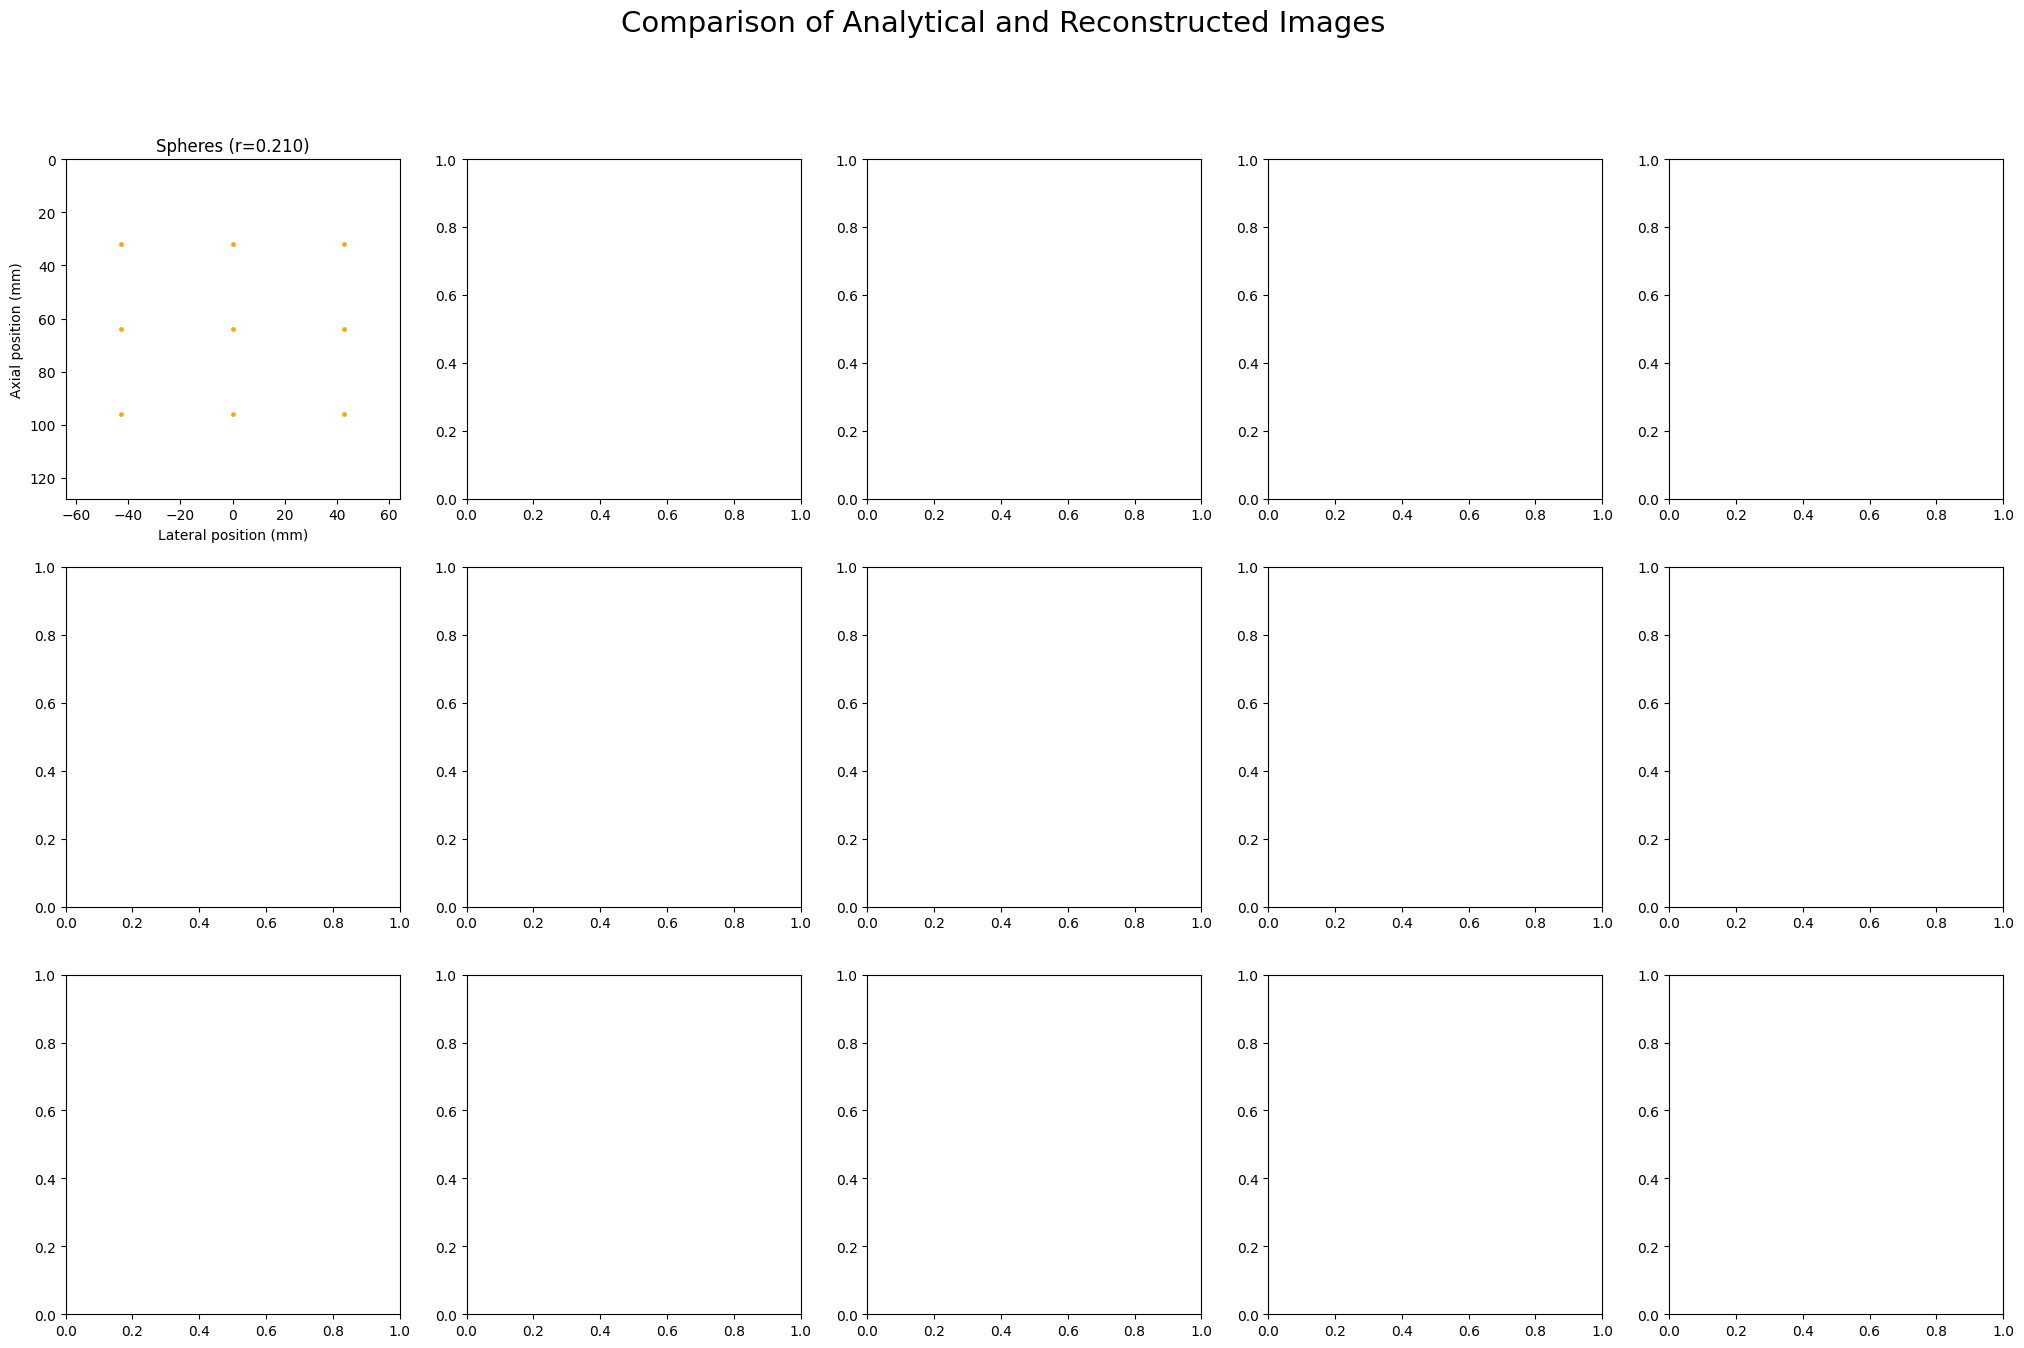

In [5]:
filename = "../outputs/20240902_180629/reconstructed_images.h5"  # Replace with your filename
reconstructed_images, superposition_data = load_reconstructed_images(filename)

# plotting params
# sphere_radii = [1.542, 0.42, 0.21]  # Your sphere radii
# Get unique sphere radii
sphere_radii = sorted(set(key[0] for key in reconstructed_images.keys()))

# Assume L is the maximum depth in your images
L = reconstructed_images[list(reconstructed_images.keys())[0]].shape[1]
delL = L / 3  # 3 = num_spheres along axis of transducer

x_positions = np.arange(-L / 2 + delL / 2, L / 2, delL)
z_positions = np.arange(L / 4, 4 * L / 5, L / 4)  # 10mm to 31mm at 10mm steps

visualize_comparison(superposition_data, reconstructed_images, sphere_radii, x_positions, z_positions, L)